In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import os

# word cloud library
from wordcloud import WordCloud

import cufflinks as cf # is a library that can work with the pandas library.
cf.go_offline() # we make graphics offline

import folium
from folium import plugins

# warnings
import warnings
warnings.filterwarnings("ignore") # we use it to not see trivial warnings in the code lines.

# Veri setini yükle
df = pd.read_csv("netflix_titles_2021.csv")

ModuleNotFoundError: No module named 'plotly'

In [2]:
df0=df.copy() #df0 a orjinal datayı kopya yaparak işlemlere kopya data setinden devam edeceğiz. Bu sayede yapılacak değişiklikler orjinal datayı etkilemeyecek.
df0

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.head() # ilk 5 satıra bakmak

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.tail() # son 5 satıra bakmak

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.sample(5) # datayı gözden geçirmek için karışık 5(istediğin kadar sayı yazabilirsin) satırı inceledik. bu satırı birkaç defa çalıştırdık.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1389,s1390,Movie,Friendsgiving,Nicol Paone,"Malin Akerman, Kat Dennings, Aisha Tyler, Jane...",United States,"January 21, 2021",2020,R,95 min,Comedies,A quiet holiday dinner among friends turns int...
7861,s7862,Movie,Revelations,Vijay Jayapal,"Chetan, Lakshmi Priyaa Chandramouli, Ananthara...",India,"March 1, 2017",2016,NR,118 min,"Dramas, International Movies","After four years together, a husband and wife ..."
8211,s8212,Movie,The Black Room,Rolfe Kanefsky,"Natasha Henstridge, Lukas Hassel, Lin Shaye, D...",United States,"August 7, 2017",2016,TV-MA,95 min,Horror Movies,A couple's new dream home morphs into a nightm...
8029,s8030,Movie,Skin Trade,Ekachai Uekrongtham,"Dolph Lundgren, Tony Jaa, Ron Perlman, Celina ...","Thailand, Canada, United States","December 17, 2018",2014,R,96 min,Action & Adventure,A New Jersey detective whose family was killed...
4005,s4006,Movie,Girl,Lukas Dhont,"Victor Polster, Arieh Worthalter, Oliver Bodar...","Netherlands, Belgium","March 15, 2019",2018,R,106 min,"Dramas, International Movies, LGBTQ Movies",Fifteen-year-old ballet dancer Lara faces phys...


In [7]:
df.info() # data setine genel bir bakış
# örneğin data setinde type sütununda boş değer yok fakat cast sütunun sadece 7982 satırında değer var yani 825 satır boş.
#sadece release_year sütunu int, diğer sütunların içeriğine bakıp nümeric olan sütunların içeriği ve type değiştirilmeli.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.shape # satır ve sütun değerlerine bakmak. çıktı şu şekilde = (satır sayısı , sütun sayısı)

(8807, 12)

In [9]:
df.columns # sütun isimlerine bakmak. Sütun isimlerinde bize problem çıkaracak harf boyutu veya noktalama işareti olmadığından değiştirmeye gerek olmayabilir

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.isnull() # datanın tamamında nan değer var mı bakıyoruz fakat bu yöntem tüm satırları ve sütunları döndürür.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum() # sütun bazında non değerlerin toplamını gözlemek


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df.nunique() # sütun bazında unique değer yani bir daha tekrar etmeyen değerleri görmek.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [13]:
df.rating.unique() #sütunlar değerlendirilirken bu şekilde değerlere bakmanın uygun olacağı düşünülüyor.

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [14]:
df.duplicated() # satır bazında tekrar eden değer var mı diye bakar.isim olarak tekrar eden sütun olmadığını görüyoruz.ancak sütun değerlerine de bakarak aynı işleve sahip sütun var mı kontrol edilmeli.

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [15]:
df.duplicated().sum() # tekrar eden değerlerin toplamına bakar ve bu data da tekrar eden değer yok

0

In [16]:
df.describe() # sadece int sütunların değerlerini gösterir

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [17]:
df.describe(include='object') # str verilerinde istatiksel değerlerini gösterir


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [18]:
# Eksik değerlerin her sütunda toplam ve oran olarak gösterilmesi
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))

              Missing Values  Percentage
director                2634   29.908028
country                  831    9.435676
cast                     825    9.367549
date_added                10    0.113546
rating                     4    0.045418
duration                   3    0.034064
show_id                    0    0.000000
type                       0    0.000000
title                      0    0.000000
release_year               0    0.000000
listed_in                  0    0.000000
description                0    0.000000


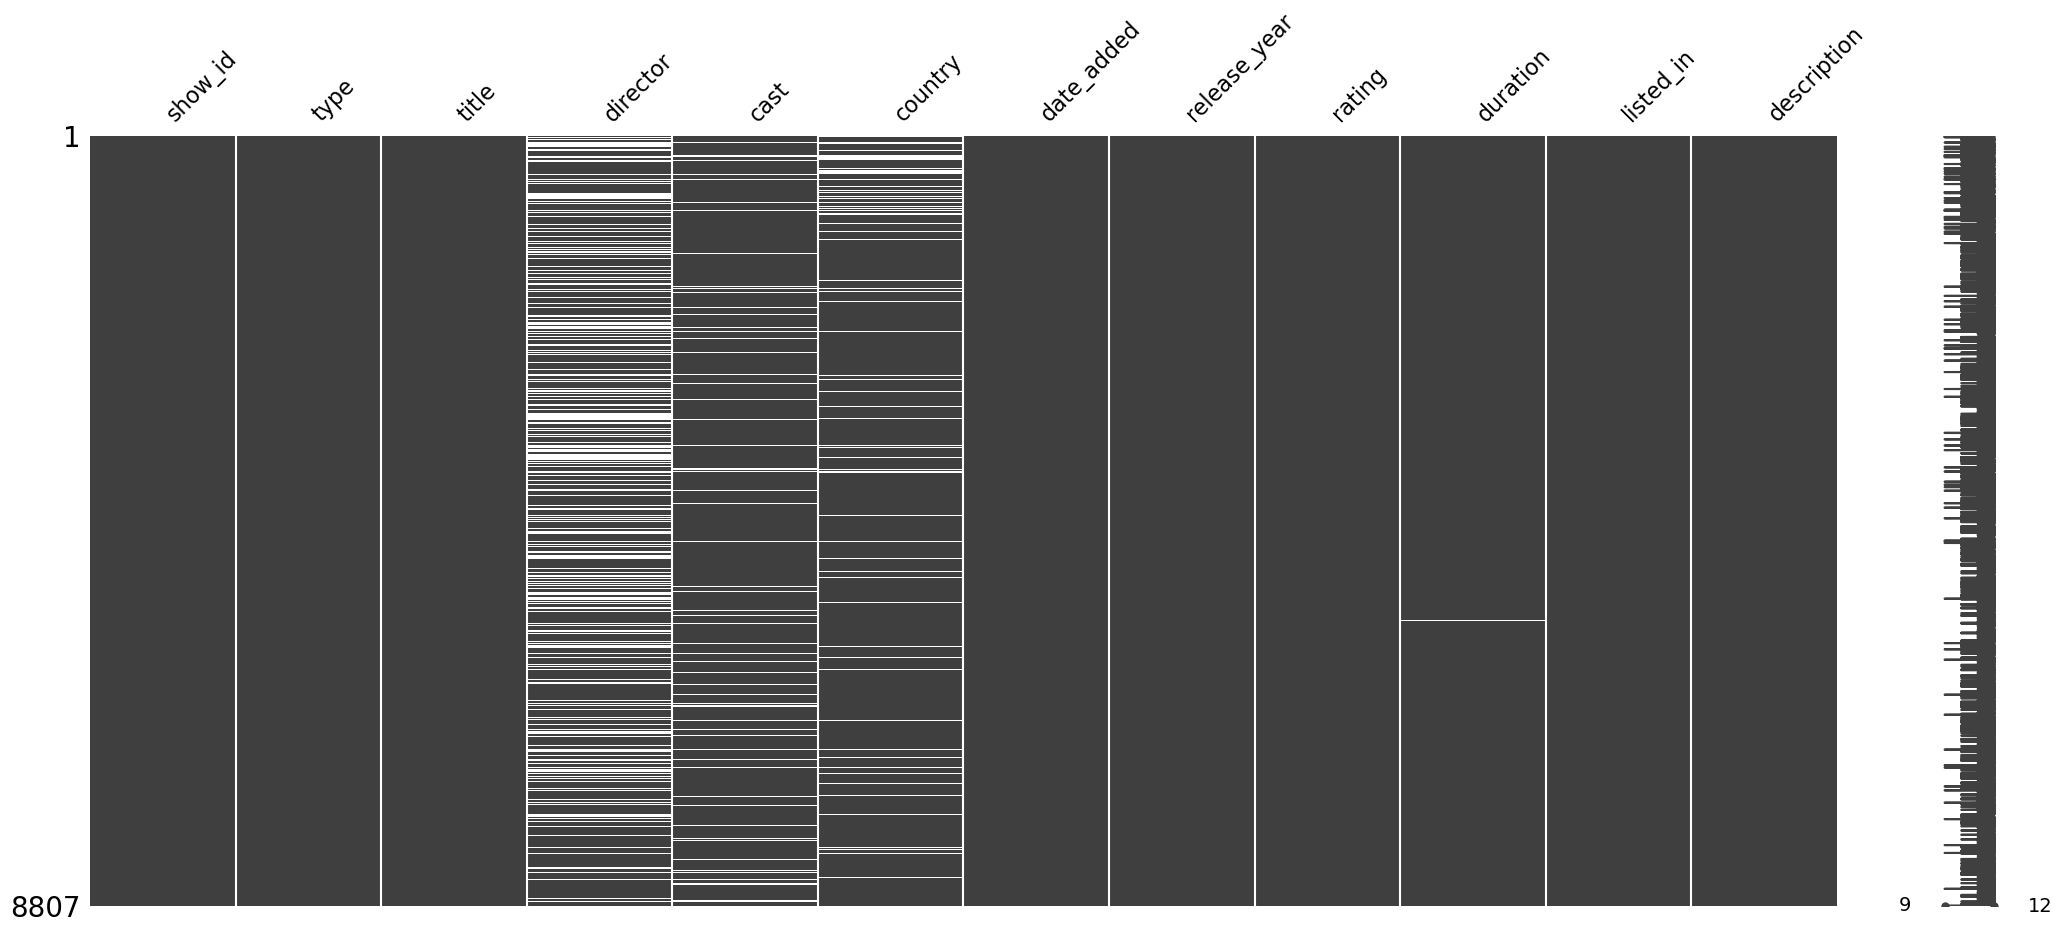

In [19]:
msno.matrix(df);

In [20]:
modes = df.mode().iloc[0]
modes
# Her sütundaki en sık tekrar eden değeri (mod) bulma

show_id                                                        s1
type                                                        Movie
title                                                      #Alive
director                                            Rajiv Chilaka
cast                                           David Attenborough
country                                             United States
date_added                                        January 1, 2020
release_year                                               2018.0
rating                                                      TV-MA
duration                                                 1 Season
listed_in                            Dramas, International Movies
description     Paranormal activity at a lush, abandoned prope...
Name: 0, dtype: object

In [21]:
modes = df.mode().iloc[0]
mode_counts = df.apply(lambda x: x.value_counts().max())
mode_counts
# yukarıda baktığımız tekrar eden değerlerin ne kadar tekrar ettiğini görüyoruz
# örneğin type sütununda movie ismi 6131 adet var

show_id            1
type            6131
title              1
director          19
cast              19
country         2818
date_added       109
release_year    1147
rating          3207
duration        1793
listed_in        362
description        4
dtype: int64

In [22]:
# IQR hesaplayarak aykırı değerleri tespit etme
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri bulma
outliers = df[(df['release_year'] < (Q1 - 1.5 * IQR)) | (df['release_year'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in 'release_year': \n{outliers}")

Outliers in 'release_year': 
     show_id   type              title          director  \
7         s8  Movie            Sankofa      Haile Gerima   
22       s23  Movie    Avvai Shanmughi    K.S. Ravikumar   
24       s25  Movie              Jeans        S. Shankar   
26       s27  Movie     Minsara Kanavu       Rajiv Menon   
41       s42  Movie               Jaws  Steven Spielberg   
...      ...    ...                ...               ...   
8764   s8765  Movie         Wyatt Earp   Lawrence Kasdan   
8766   s8767  Movie                XXx         Rob Cohen   
8768   s8769  Movie  Y Tu Mamá También    Alfonso Cuarón   
8770   s8771  Movie            Yaadein      Subhash Ghai   
8792   s8793  Movie        Young Tiger            Mu Chu   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
22    Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
26    Arvind S

In [23]:
# Aykırı yılların dağılımını incele
outlier_years = outliers['release_year'].value_counts()
print(outlier_years)

release_year
2003    61
2002    51
2001    45
1999    39
1997    38
2000    37
1998    36
1993    28
1995    25
1996    24
1992    23
1994    22
1990    22
1988    18
1982    17
1991    17
1989    16
1981    13
1986    13
1984    12
1979    11
1980    11
1983    11
1973    10
1985    10
1976     9
1987     8
1978     7
1975     7
1974     7
1977     7
1971     5
1972     5
1967     5
1945     4
1960     4
1962     3
1968     3
1955     3
1944     3
1943     3
1958     3
1963     2
1956     2
1969     2
1954     2
1964     2
1965     2
1946     2
1942     2
1970     2
1925     1
1966     1
1959     1
1961     1
1947     1
Name: count, dtype: int64


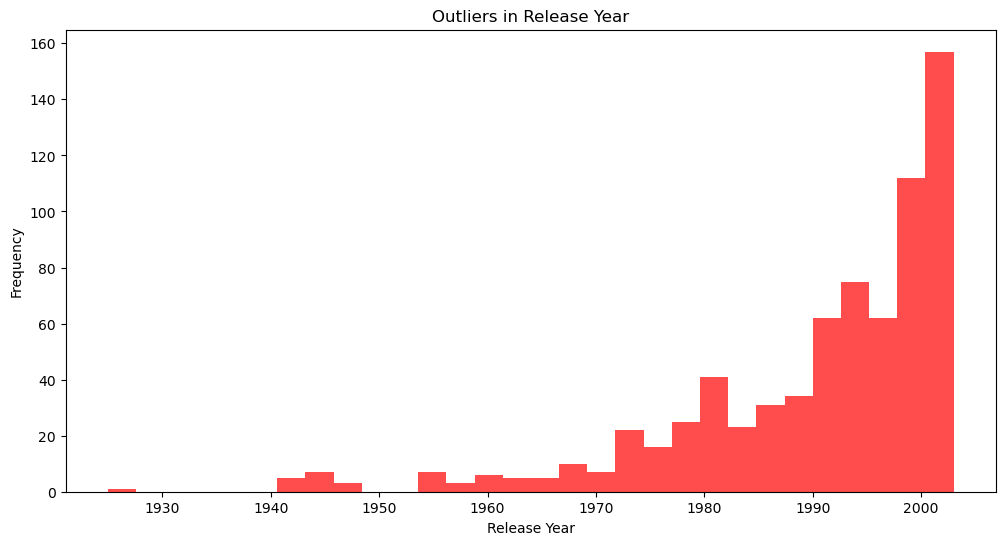

In [24]:
import matplotlib.pyplot as plt

# Aykırı yılların bir dağılım grafiği
plt.figure(figsize=(12, 6))
plt.hist(outliers['release_year'], bins=30, color='red', alpha=0.7)
plt.title('Outliers in Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Aşağıdaki grafik aykırı değerin en solda (1930) yıllarında oluğunu, film sektörünün artan yıllarda gelişme gösterdiğini, grafiğin en başında ve en solunda aykırı değer olduğunu
# grafik ortalama değerlerin 60 - 70 bantlarında, medyanın ise 40 - 50 bantlarında oludğu görüldüğünde grafiğin en başında ve en solunda aykırı değerlerin olduğu rahatlıkla tespit edilrbilir.

## Eksik Verileri Doldurma

Veri setindeki eksik değerlerin hangi sütunlarda olduğunu belirledikten sonra, aşağıdaki stratejilerden birini ya da birkaçını kullanabiliriz:

1. Kategorik Veriler İçin: En yaygın değerle (mode) ya da belirli bir sabit değerle doldurabiliriz.
2. Sayısal Veriler İçin: Ortalama (mean), medyan (median) veya interpolasyon ile doldurabiliriz.
3. Metinsel Veriler İçin: Unknown, Not Available, gibi belirli bir sabit değerle doldurabiliriz.


In [25]:
# director ( yönetmen) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['director'] = df['director'].fillna('Unknown')
df.director.value_counts()

director
Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [26]:
# cast (oyuncular) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['cast'] = df['cast'].fillna('Unknown')
df.cast.value_counts()

cast
Unknown                                                                                                                                                                                       825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                         

In [27]:
# country (ülke) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['country'] = df['country'].fillna('Unknown')
df.country.value_counts()

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [28]:
# date_added (eklenme tarihi) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['date_added'] = df['date_added'].fillna('Unknown')
df.date_added.value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1768, dtype: int64

In [29]:
# rating sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['rating'] = df['rating'].fillna('Unknown')
df.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [30]:
# duration (süre) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['duration'] = df['duration'].fillna('Unknown')
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

In [31]:
# Tarih Örneği "January 8, 2018" 
# Bu yüzden başında sonunda boşluk varsa siliyoruz ve Ay ın ilk harfini büyük yapıyoruz.
df['date_added'] = df['date_added'].str.strip().str.title()

In [32]:
# Tarih sütununu gün, ay, yıl olarak ayırma
# Tarih Örneği "January 8, 2018" ne uyan format = format="%B %d, %Y"
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce') 

df['year'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month'] = df['date_added'].dt.month.fillna(0).astype(int)
df['day'] = df['date_added'].dt.day.fillna(0).astype(int)

In [33]:
df['season'] = df['month'].apply(lambda x: 
                                 "winter" if x in [12, 1, 2] else 
                                 "spring" if x in [3, 4, 5] else 
                                 "summer" if x in [6, 7, 8] else 
                                 "autumn")

In [34]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season
748,s749,TV Show,"Fresh, Fried & Crispy",Unknown,Unknown,United States,2021-06-09,2021,TV-PG,1 Season,Reality TV,"Passionate about food and ready for fun, criti...",2021,6,9,summer
4846,s4847,TV Show,The Break with Michelle Wolf,Unknown,Unknown,United States,2018-05-27,2018,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Nobody's safe as Michelle Wolf unapologeticall...,2018,5,27,spring
6605,s6606,Movie,Di Renjie zhi Sidatianwang,Hark Tsui,"Mark Chao, Feng Shaofeng, Kenny Lin, Carina La...","China, Hong Kong",2019-02-06,2018,TV-14,132 min,"Action & Adventure, International Movies, Sci-...",Framed by an empress who plans to steal a drag...,2019,2,6,winter
157,s158,Movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,2021-09-01,2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...,2021,9,1,autumn
4073,s4074,Movie,Four Sisters and a Wedding,Cathy Garcia-Molina,"Bea Alonzo, Toni Gonzaga, Angel Locsin, Shaina...",Philippines,2019-02-27,2013,TV-14,125 min,"Comedies, Dramas, International Movies",Four sisters unite to stop their young brother...,2019,2,27,winter
8567,s8568,TV Show,The Year of Happiness and Love,Unknown,"Amber Kuo, James Wen, Weber Yang, Sonia Sui, N...",Taiwan,2016-09-01,2009,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Jiang Chen-bo is a loser without prospects for...,2016,9,1,autumn
2707,s2708,Movie,Angel Has Fallen,Ric Roman Waugh,"Gerard Butler, Morgan Freeman, Nick Nolte, Dan...",United States,2020-04-04,2019,R,121 min,Action & Adventure,Secret Service agent Mike Banning is caught in...,2020,4,4,spring
1881,s1882,Movie,American Pie 9: Girls' Rules,Mike Elliott,"Madison Pettis, Lizze Broadway, Piper Curda, N...",United States,2020-10-06,2020,R,96 min,Comedies,Four tight-knit high school seniors vow to tur...,2020,10,6,autumn
538,s539,TV Show,The A List,Unknown,"Lisa Ambalavanar, Ellie Duckles, Savannah Bake...",United Kingdom,2021-07-06,2021,TV-PG,2 Seasons,"British TV Shows, International TV Shows, TV D...","Romance, rivalry and radical mystery collide a...",2021,7,6,summer
7927,s7928,Movie,Sameer Abu Alneel,Amr Arafa,"Ahmed Mekky, Nicole Saba, Mohamed Lotfy, Hussi...",Egypt,2019-06-06,2013,TV-14,107 min,"Comedies, International Movies","Disliked for his stinginess, Samir finds his l...",2019,6,6,summer


In [35]:
# duration sütunundaki verilerin bir kısmı "X min" (dakika cinsinden) ve bir kısmı "X Seasons" (sezon sayısı) olarak girilmiş. 
# Bu durumda, iki farklı veri türüyle karşı karşıyayız:

# Dakika Cinsinden Süre (min): Filmler için kullanılıyor.
# Sezon Sayısı (Seasons): Diziler için kullanılıyor.

In [36]:
# 1. Veri Türlerini Ayırma
# İlk olarak, film ve dizi verilerini ayrı sütunlara ayırabiliriz.

# 'min' içeren değerler için yeni bir sütun
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in str(x) else np.nan)

# 'Seasons' içeren değerler için yeni bir sütun
df['duration_seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in str(x) else np.nan)

In [37]:
# 2. Eksik Değerleri Doldurma
# Eksik olan dakikaları veya sezon sayısını tahmin edebilir ya da eksik veriler için belirli bir sabit değer kullanabiliriz.

# Dakika cinsinden süreyi ortalama ile doldurma (eğer sayı olarak boşsa)

flt1 = [i == "Movie" for i in df.loc[:, "type"]]
df.loc[flt1, 'duration_minutes'] = df.loc[flt1, 'duration_minutes'].fillna(df.loc[flt1, 'duration_minutes'].mean())

# Sezon sayısını mod (en yaygın değer) ile doldurma (eğer sayı olarak boşsa)
flt2 = [i == "TV Show" for i in df.loc[:, "type"]]
df.loc[flt2, 'duration_seasons'] = df.loc[flt2, 'duration_seasons'].fillna(df.loc[flt2, 'duration_seasons'].mode()[0])

In [38]:
df.loc[:, 'duration_minutes'].value_counts()

duration_minutes
90.0     152
94.0     146
93.0     146
97.0     146
91.0     144
        ... 
16.0       1
8.0        1
9.0        1
208.0      1
191.0      1
Name: count, Length: 206, dtype: int64

In [39]:
df.loc[:, 'duration_seasons'].value_counts()

duration_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
15.0       2
12.0       2
11.0       2
17.0       1
Name: count, dtype: int64

In [40]:
# 3. Orijinal 'duration' Sütununu Temizleme
# Orijinal duration sütununu, yeni oluşturulan duration_minutes ve duration_seasons sütunları ile değiştirebiliriz.

# 'duration' sütununu yeni oluşturulan sütunlara göre güncelleme
# Film ve dizi ayırma ve duration sütununu yeniden düzenleme
df['duration'] = df.apply(lambda row: f"{int(row['duration_minutes'])} min" if row['type'] == 'Movie' 
                        else f"{int(row['duration_seasons'])} Seasons", axis=1)

In [41]:
df[['title', 'duration', 'duration_minutes', 'duration_seasons']].head(5)

,title,duration,duration_minutes,duration_seasons
0,Dick Johnson Is Dead,90 min,90.0,NaN
1,Blood & Water,2 Seasons,NaN,2.0
2,Ganglands,1 Seasons,NaN,1.0
3,Jailbirds New Orleans,1 Seasons,NaN,1.0
4,Kota Factory,2 Seasons,NaN,2.0


## Veri Temizleme

In [42]:
# 1. Tekrar eden satırları silme:
# Eğer aynı film birden fazla kez eklenmişse, bunları silebiliriz.

df = df.drop_duplicates()

In [43]:
# 2. Gereksiz boşlukları temizleme:
# Bazı metinlerin başında veya sonunda gereksiz boşluklar olabilir. Bunları temizleyelim.

df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()

## Eksik Veri için Son Kontrol

In [44]:
# Son kontrol:
# Tüm bu işlemlerden sonra, tekrar eksik veri kontrolü yapalım.

last_df_missing = df.isnull().sum()
last_df_missing

show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added            10
release_year           0
rating                 0
duration               0
listed_in              0
description            0
year                   0
month                  0
day                    0
season                 0
duration_minutes    2676
duration_seasons    6131
dtype: int64

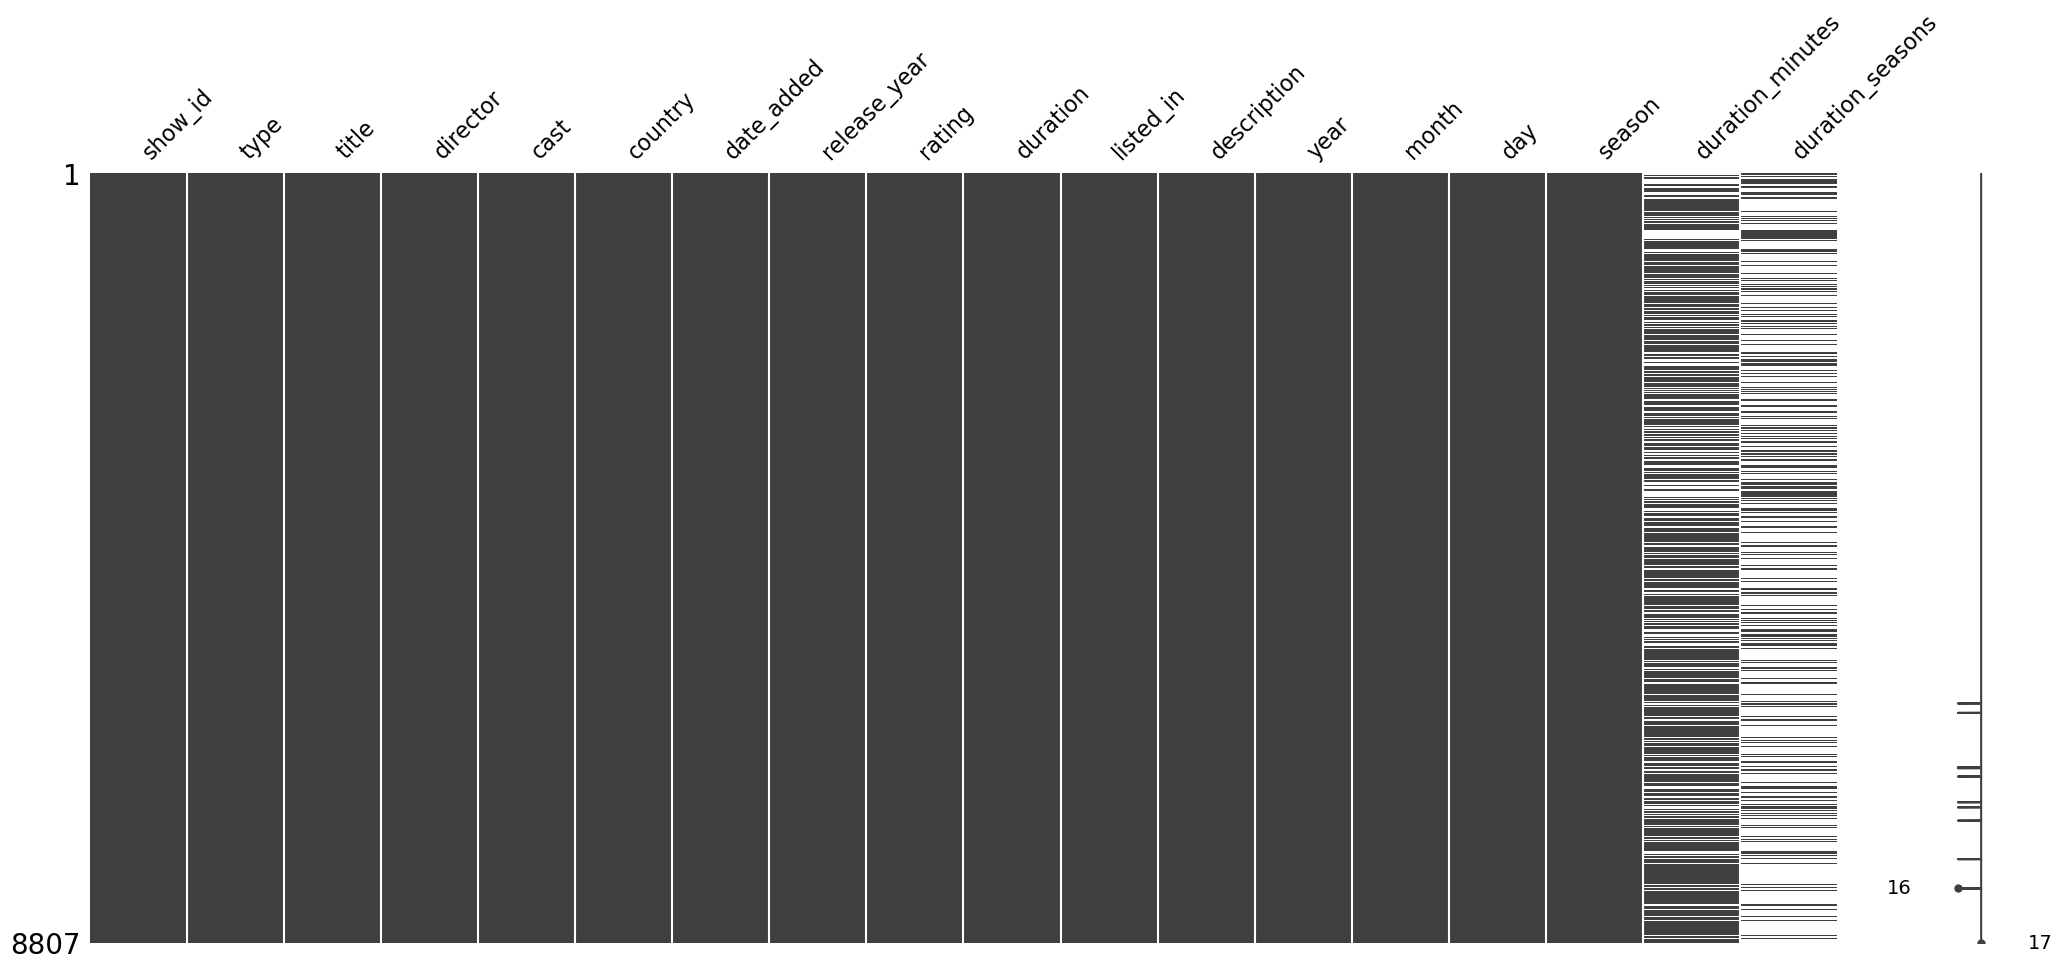

In [45]:
import missingno as msno
msno.matrix(df);

In [46]:
flt_mov = [True if i > 0 else False for i in df.loc[:, "duration_minutes"]]
df.loc[flt_mov, :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,autumn,90.0,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,24,autumn,91.0,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,autumn,125.0,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24,autumn,104.0,NaN
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23,autumn,127.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3,9,spring,96.0,NaN
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,20,autumn,158.0,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,1,autumn,88.0,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,11,winter,88.0,NaN


In [47]:
flt_ser = [True if i > 0 else False for i in df.loc[:, "duration_seasons"]]
df.loc[flt_ser, :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season,duration_minutes,duration_seasons
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,autumn,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,autumn,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,autumn,NaN,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,autumn,NaN,2.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Seasons,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,24,autumn,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,5,1,spring,NaN,2.0
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1,17,winter,NaN,2.0
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,13,autumn,NaN,3.0
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Seasons,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,15,winter,NaN,1.0


<p style="background: linear-gradient(to right,#6319ca ,#e0b633); background-color: #6319ca; color: #fff;
font-family: Trebuchet MS; font-size: 50px; font-weight: 800; font-style: italic; text-decoration: none; 
padding: 15px 15px; border: 5px solid #180591; border-radius: 20px; justify-content: center; 
align-items: center; box-shadow: 0px 0px 10px 0px #2D2D2D; text-shadow: 2px 2px 0px #000; text-align:center;">
DATA VISUALIZATION
</p>

In [48]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season,duration_minutes,duration_seasons
1133,s1134,Movie,Sniper: Ghost Shooter,Don Michael Paul,"Chad Michael Collins, Billy Zane, Dennis Haysb...",United States,2021-04-01,2016,R,99 min,Action & Adventure,Snipers ordered to protect a gas pipeline from...,2021,4,1,spring,99.0,NaN
7804,s7805,Movie,Pusher,Luis Prieto,"Richard Coyle, Bronson Webb, Agyness Deyn, Mem...",United Kingdom,2017-12-27,2012,R,89 min,Action & Adventure,"In this remake of a 1996 Danish thriller, a dr...",2017,12,27,winter,89.0,NaN
7824,s7825,Movie,Raja Hindustani,Dharmesh Darshan,"Aamir Khan, Karisma Kapoor, Suresh Oberoi, Joh...",India,2017-05-01,1996,TV-14,177 min,"Dramas, International Movies, Romantic Movies",When a poor taxi driver falls in love with a w...,2017,5,1,spring,177.0,NaN
4746,s4747,Movie,Kath & Kimderella,Ted Emery,"Jane Turner, Gina Riley, Magda Szubanski, Glen...",Australia,2018-07-28,2012,TV-14,86 min,Comedies,"Chipper baby boomer Kath, diva daughter Kim an...",2018,7,28,summer,86.0,NaN
7796,s7797,Movie,Princess Cyd,Stephen Cone,"Tyler Ross, Rebecca Spence, James Vincent Mere...",United States,2018-02-05,2017,TV-MA,97 min,"Dramas, Independent Movies, LGBTQ Movies",A teenager moves to Chicago for the summer and...,2018,2,5,winter,97.0,NaN


<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"type" sütunu</b></p>

## Film ve dizilerin veri setindeki dağılımını göstermek için pasta grafiği ve bar grafiği

In [49]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

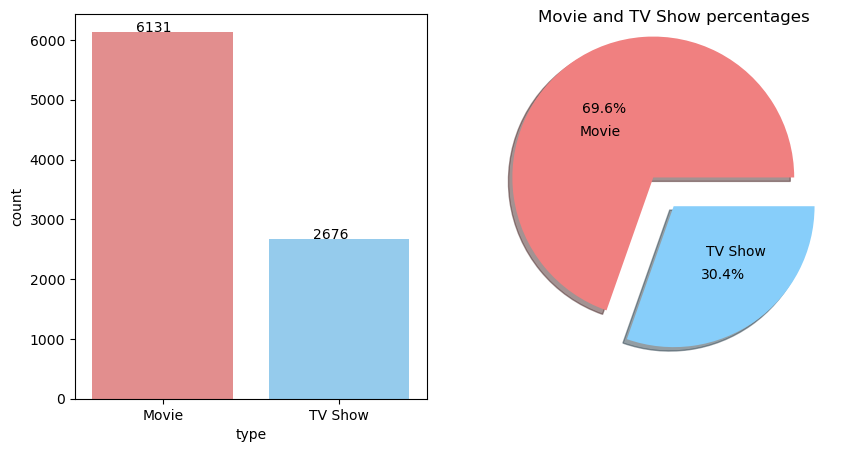

In [50]:
color_list = ["lightcoral", "lightskyblue"]
explode_list = [0.25, 0]

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(data = df, x = "type", ax = ax[0], palette = color_list)
plt.pie(df.type.value_counts(), labels = df.type.unique(), pctdistance = 0.6, labeldistance = 0.4,
         autopct = '%1.1f%%', shadow = True, colors = color_list, explode = explode_list)

plt.title('Movie and TV Show percentages')

for p in ax[0].patches:
    ax[0].annotate(f"{int(p.get_height())}", (p.get_x() + 0.25, p.get_height() + 1))
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"title" sütunu</b></p>

# Film veya dizi isimlerindeki en çok tekrar eden 20 kelimenin bar grafiği ile gösterimi (Ön eklerden ve artikellerden arındırılmış)

In [86]:
# En çok kullanılan kelimeler (title sütunu) analizi için metin ön işleme
from collections import Counter
import string

In [102]:
# Kelimeleri çıkarmak için replace işlemi
excluded_words = {' the ': "", ' of ': "", ' a ': "", ' in ': "", ' and ': "", ' to ': "", ' 2 ': "", ' for ': "", ' on ': "", 'The': "", '&': "", 'A ': "", '2': ""}
filtered_df = df['title']

# Kelimeleri title'dan çıkar
for word, replacement in excluded_words.items():
    filtered_df = filtered_df.str.replace(word, replacement, case=False)

In [105]:
# Kelime frekanslarını hesaplama
all_words = ' '.join(filtered_df).split()
word_freq = Counter(all_words)

# En sık geçen 20 kelime
most_common_words = word_freq.most_common(20)
most_common_words

[('My', 129),
 ('Love', 114),
 ('I', 93),
 ('with', 67),
 ('Christmas', 66),
 ('You', 64),
 ('Man', 62),
 ('Little', 58),
 ('One', 50),
 ('Story', 50),
 ('American', 50),
 ('Last', 47),
 ('Life', 44),
 ('Me', 44),
 ('Black', 43),
 ('Super', 42),
 ('Day', 40),
 ('Is', 39),
 ('We', 38),
 ('Power', 38)]

In [107]:
# En sık geçen 20 kelimeyi gösterme
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
most_common_words_df

,Word,Frequency
0,My,129
1,Love,114
2,I,93
3,with,67
4,Christmas,66
5,You,64
6,Man,62
7,Little,58
8,One,50
9,Story,50


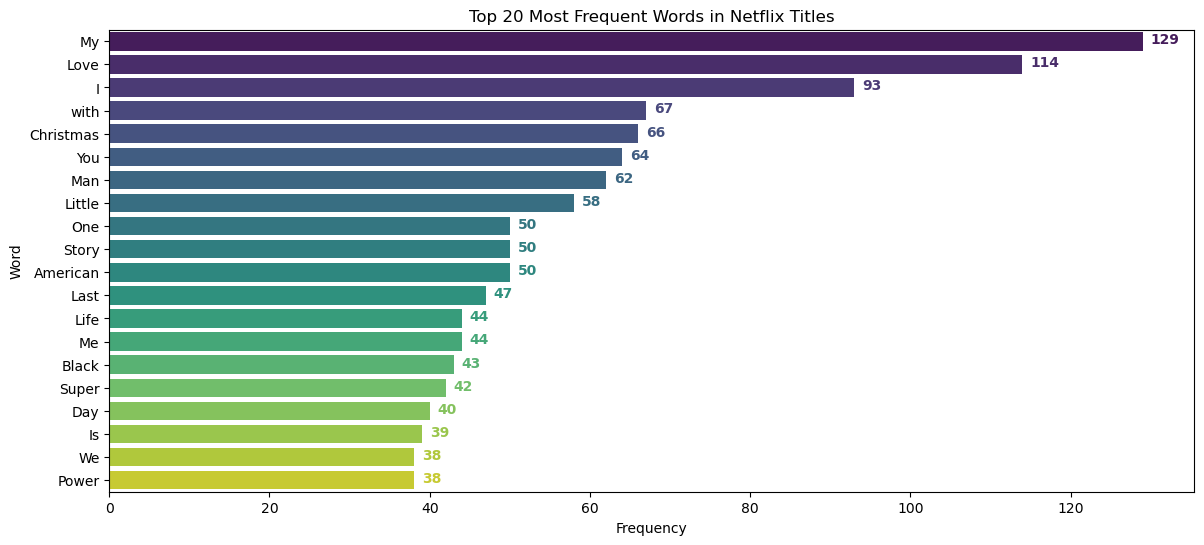

In [110]:
# En sık geçen 20 kelimeyi gorsel olarak gosterme
fig, ax = plt.subplots(figsize = (14, 6))
sns.barplot(x='Frequency', y='Word', data=most_common_words_df, palette='viridis')

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
    
plt.title('Top 20 Most Frequent Words in Netflix Titles')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"date_added" sütunu</b></p>

## Platforma eklenme tarihine göre film ve dizi sayısını gösteren çizgi grafiği ve bar grafiği, manipülasyon ile oluşturulan mevsim sütunu için pasta grafiği

In [51]:
df_grouped = df[df.year > 0].groupby(['year', 'type']).size().reset_index(name='count').sort_values("year")
df_grouped

,year,type,count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


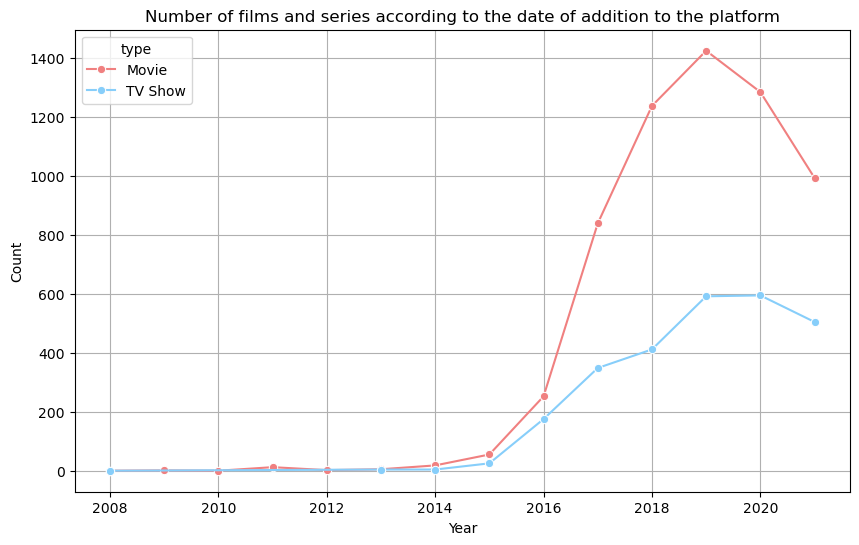

In [52]:
color_list = ["lightcoral", "lightskyblue"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='year', y='count', hue='type', marker='o', palette=color_list)

plt.title('Number of films and series according to the date of addition to the platform')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

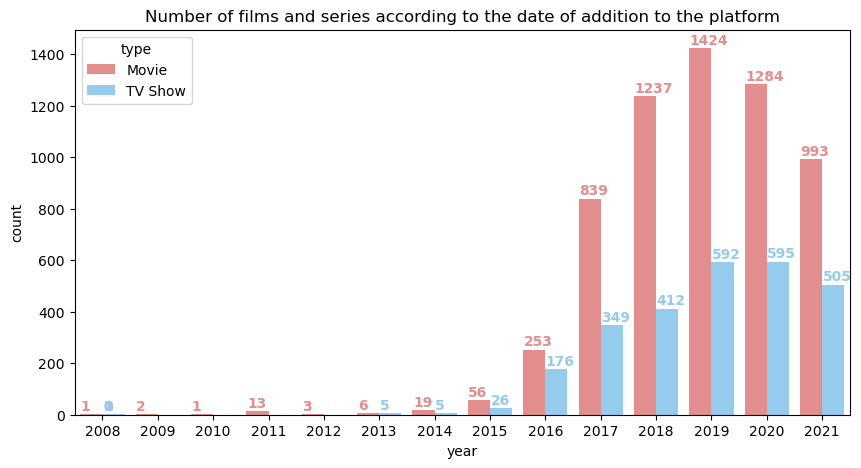

In [53]:
color_list = ["lightcoral", "lightskyblue"]

fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x = "year", hue = "type", data = df[df.year > 0], palette=color_list)

plt.title('Number of films and series according to the date of addition to the platform')

for p in ax.patches:
    bar_color = p.get_facecolor()

    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.01, p.get_height() + 15), fontsize=10, color=bar_color, fontweight='bold')

plt.show()

In [54]:
df.season.value_counts()

season
summer    2310
autumn    2245
spring    2138
winter    2114
Name: count, dtype: int64

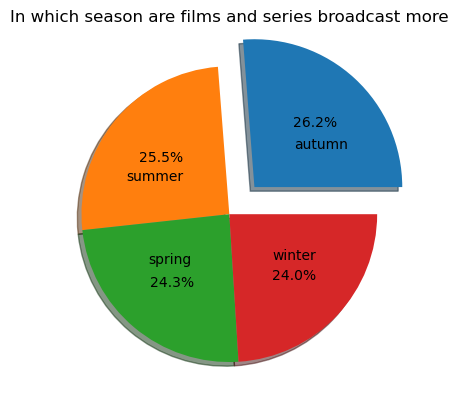

In [55]:
explode_list = [0.25, 0, 0, 0]

plt.pie(df.season.value_counts(), labels = df.season.unique(), pctdistance = 0.6, labeldistance = 0.4,
         autopct = '%1.1f%%', shadow = True, colors = plt.get_cmap('tab10').colors[:4], explode = explode_list)

plt.title('In which season are films and series broadcast more')
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"release_year" sütunu</b></p>

## Yayınlanma tarihine göre film ve dizi sayısını gösteren çizgi grafiği ve bar grafiği (2010 yılından itibaren)

In [56]:
df_release = df.groupby(['release_year', 'type']).size().reset_index(name='count').sort_values("release_year", ascending=False)
df_release = df_release.head(24)
df_release

,release_year,type,count
118,2021,TV Show,315
117,2021,Movie,277
116,2020,TV Show,436
115,2020,Movie,517
114,2019,TV Show,397
113,2019,Movie,633
112,2018,TV Show,380
111,2018,Movie,767
110,2017,TV Show,265
109,2017,Movie,767


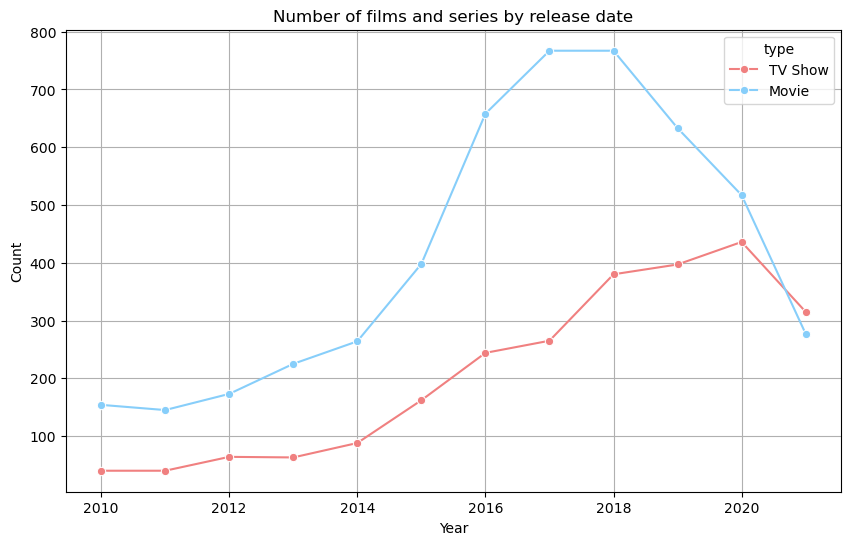

In [57]:
color_list = ["lightcoral", "lightskyblue"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_release, x='release_year', y='count', hue='type', marker='o', palette=color_list)

plt.title('Number of films and series by release date')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

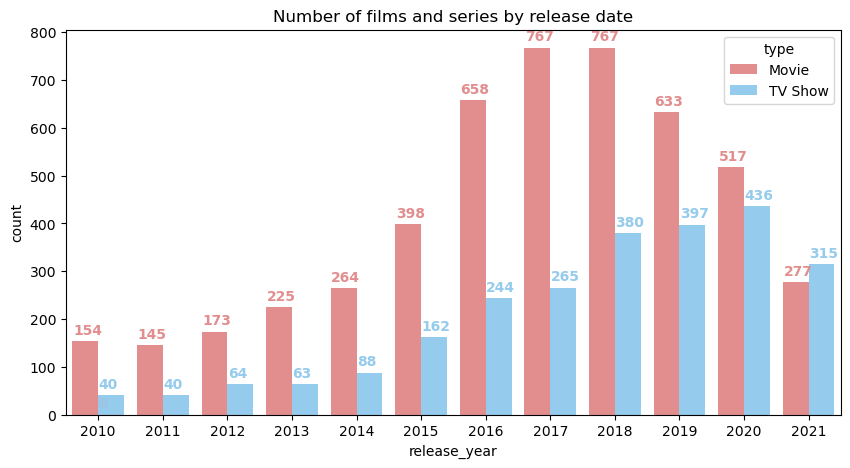

In [58]:
color_list = ["lightcoral", "lightskyblue"]

fig, ax = plt.subplots(figsize = (10, 5))

ax = sns.countplot(x = "release_year", hue = "type", data = df[df.release_year >= 2010], palette=color_list)

plt.title('Number of films and series by release date')

for p in ax.patches:
    bar_color = p.get_facecolor()

    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.01, p.get_height() + 15), fontsize=10, color=bar_color, fontweight='bold')

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"rating" sütunu</b></p>

# Hangi derecelendirmelerde daha fazla içerik olduğunu gösteren bar grafiği 

In [59]:
df['rating'].value_counts().head(11)

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
G          41
Name: count, dtype: int64

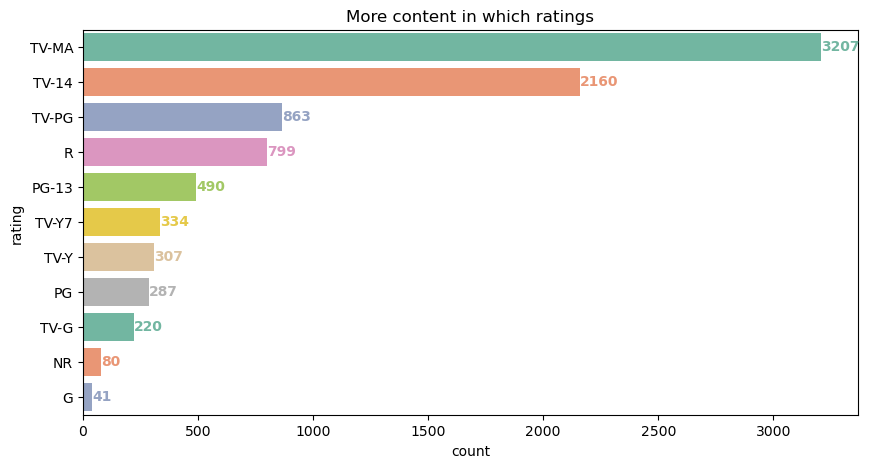

In [60]:
order = df['rating'].value_counts().head(11).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, y = "rating", palette = "Set2", order = order)

plt.title('More content in which ratings')

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"country" sütunu</b></p>

# Farklı ülkelerde üretilen tüm içeriklerin sayısını göstermek için dünya haritası

In [61]:
mapList = pd.read_csv("country konum.csv")
mapList.head()

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6


In [62]:
type_counts = df[df.country != "Unknown"].groupby(['country', 'type']).size().unstack(fill_value=0).reset_index().sort_values("Movie", ascending=False).head(10)
type_counts

type,country,Movie,TV Show
603,United States,2058,760
251,India,893,79
506,United Kingdom,206,213
58,Canada,122,59
444,Spain,97,48
150,Egypt,92,14
368,Nigeria,86,9
272,Indonesia,77,2
319,Japan,76,169
492,Turkey,76,29


In [63]:
country_coords = mapList[mapList['Country'].isin(type_counts.loc[:,"country"])]
country_coords = country_coords[['Country', 'Latitude (average)', 'Longitude (average)']]
country_coords

,Country,Latitude (average),Longitude (average)
37,Canada,60.0,-95.0
62,Egypt,27.0,30.0
99,India,20.0,77.0
100,Indonesia,-5.0,120.0
108,Japan,36.0,138.0
159,Nigeria,10.0,8.0
203,Spain,40.0,-4.0
222,Turkey,39.0,35.0
229,United Kingdom,54.0,-2.0
230,United States,38.0,-97.0


In [64]:
# Harita oluştur
m = folium.Map(location=[20,0], zoom_start=2)

# Koordinatları ülkelere göre `type` sayılarını ekle
for _, row in country_coords.iterrows():
    country = row['Country']
    latitude = row['Latitude (average)']
    longitude = row['Longitude (average)']
    
    # Ülkeye göre tip sayılarını al
    type_counts_row = type_counts[type_counts['country'] == country]
    movie_count = type_counts_row['Movie'].values[0] if 'Movie' in type_counts_row.columns else 0
    tv_shows_count = type_counts_row['TV Show'].values[0] if 'TV Show' in type_counts_row.columns else 0
    
    # Popup mesajı
    popup_message = f"Country: {str(type_counts_row["country"].values).upper()[2:-2]}, Movies: {movie_count}, TV Shows: {tv_shows_count}"
    
    # Marker ekle
    folium.Marker(
        location=[latitude, longitude],
        popup=popup_message,
        icon=folium.Icon(color='blue' if movie_count > tv_shows_count else 'red')
    ).add_to(m)

# Haritayı göster
m.save('map.html')
m

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"director" sütunu</b></p>

# En çok içerik üreten yönetmenleri gösteren bar grafiği

In [65]:
df[df.director != "Unknown"].director.value_counts().head(13)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Name: count, dtype: int64

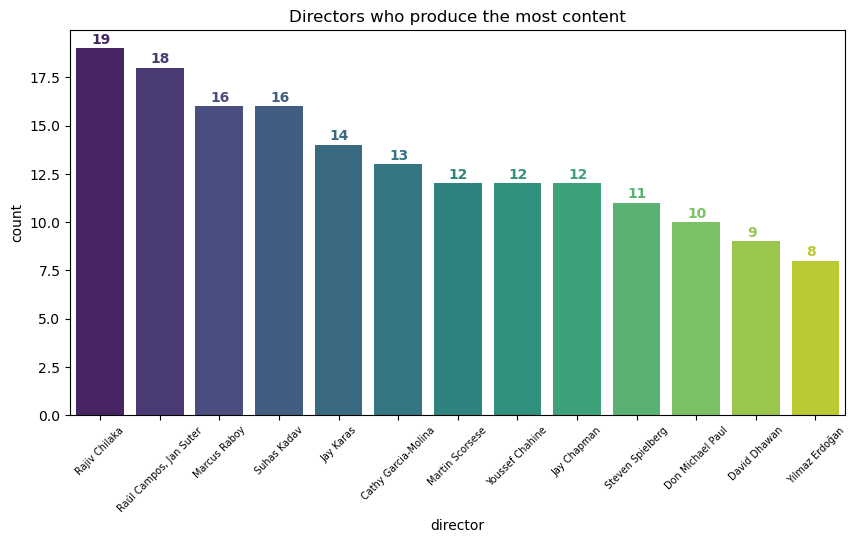

In [66]:
order = df[df.director != "Unknown"].director.value_counts().head(13).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, x = "director", palette = "viridis", order = order)

plt.title('Directors who produce the most content')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + 0.25, p.get_height() + 0.25), fontsize=10, color=p.get_facecolor(), fontweight='bold')

plt.xticks(rotation=45, fontsize=7)

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"duration" sütunu</b></p>

# Filmler için dakika bazında, diziler için sezon bazında içerik süresi dağılımını histogram ile göstermek.

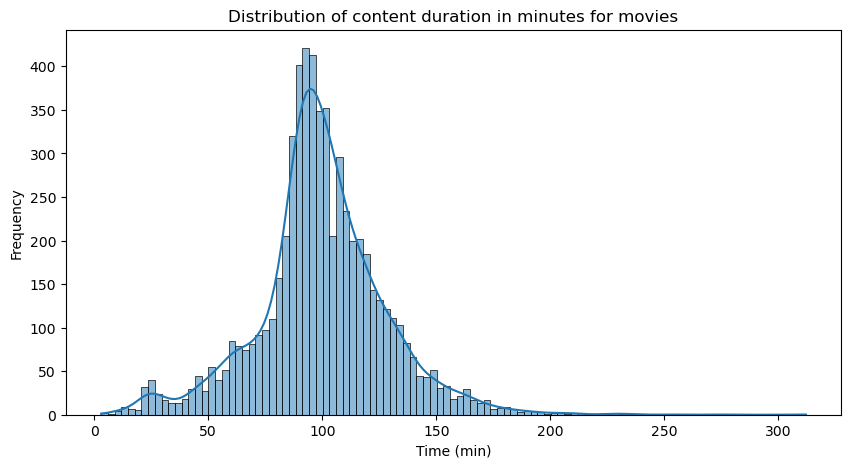

In [67]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(x = "duration_minutes", data = df, kde = True)

plt.title("Distribution of content duration in minutes for movies")
plt.xlabel("Time (min)")
plt.ylabel("Frequency")

plt.show()

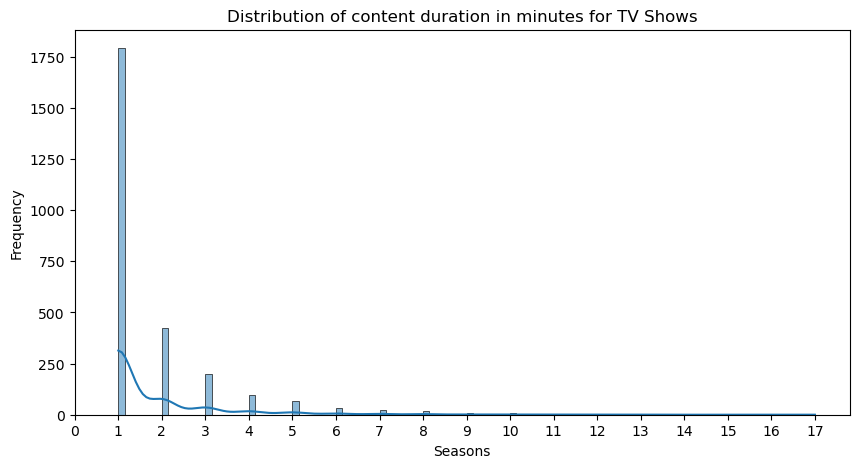

In [68]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(x = "duration_seasons", data = df, kde = True)

plt.title("Distribution of content duration in minutes for TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Frequency")

plt.xticks(ticks=range(0, 18, 1))

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"release_year &duration" sütunu</b></p>

# İçeriklerin yayınlandığı yıl ile süresi arasındaki ilişkiyi scatter plot (dağılım grafiği)

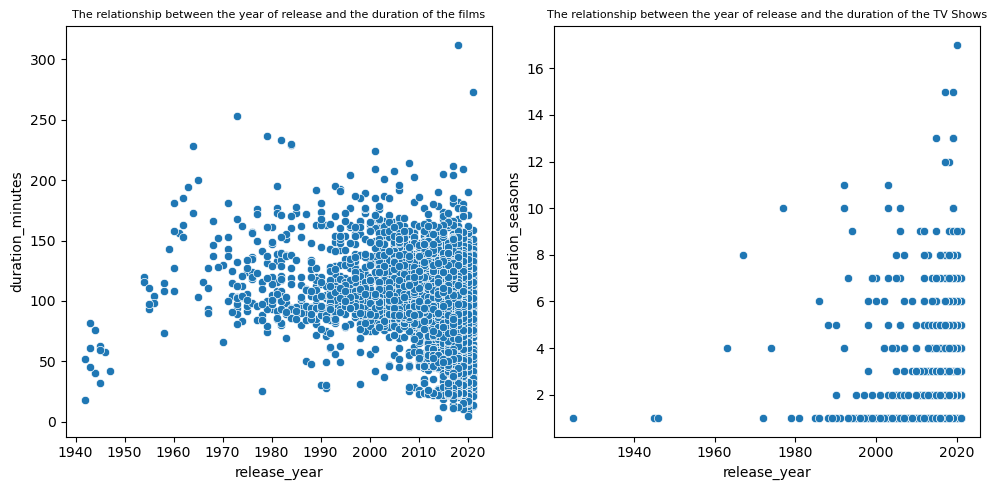

In [69]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.scatterplot(y = "duration_minutes", x = "release_year", data = df, ax = ax[0])
sns.scatterplot(y = "duration_seasons", x = "release_year", data = df, ax = ax[1])

ax[0].set_title('The relationship between the year of release and the duration of the films', fontsize=8)  # İlk grafik için başlık
ax[1].set_title('The relationship between the year of release and the duration of the TV Shows', fontsize=8)  # İkinci grafik için başlık

plt.tight_layout()
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"release_year & type" sütunu</b></p>

# Her yıl içerisinde kaç adet film ve kaç adet dizi eklendiğini göstermek için stacked (yığılmış) bar grafiği

In [70]:
data = pd.DataFrame({
    'release_year': df.release_year,
    'type': df.type
})

data = data[data.release_year >= 2000]

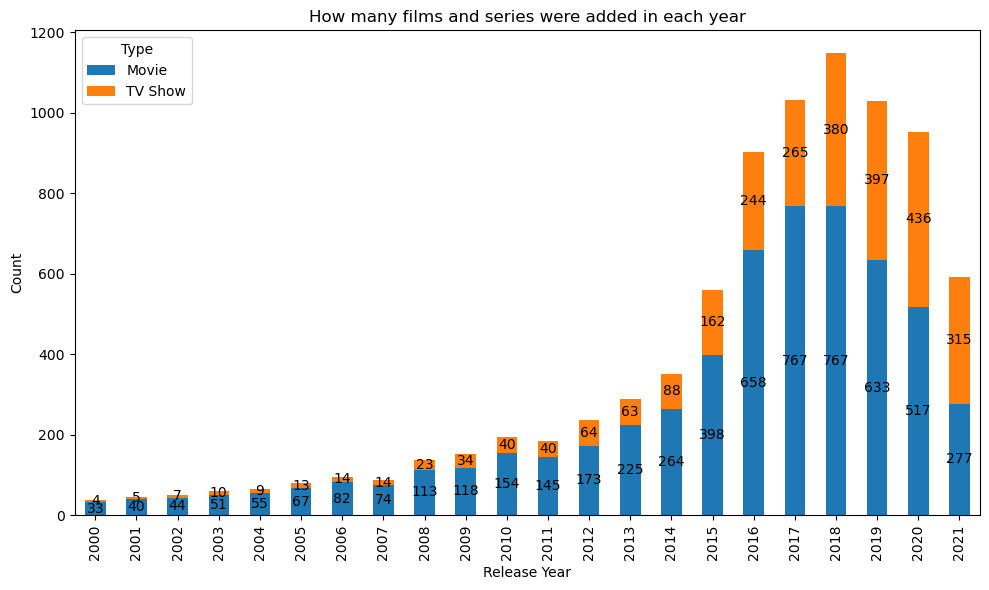

In [71]:
# Veriyi yıllara ve 'type' sütununa göre gruplandırma
grouped_data = data.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Stacked bar grafiği çizme
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Barların üzerine sayıların yazdırılması
for container in ax.containers:
    ax.bar_label(container, label_type='center')  # label_type='center' sayıları barların ortasına yerleştirir

# Grafik başlık ve etiketleri
plt.title('How many films and series were added in each year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.tight_layout()
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"cast" sütunu</b></p>

# Oyuncu isimlerinin sıklığını göstermek için kelime bulutu (word cloud)

In [72]:
# 'cast' sütunundaki tüm oyuncu isimlerini bir araya getir
text = ' '.join(df[df.cast != "Unknown"].cast)
text

'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley,

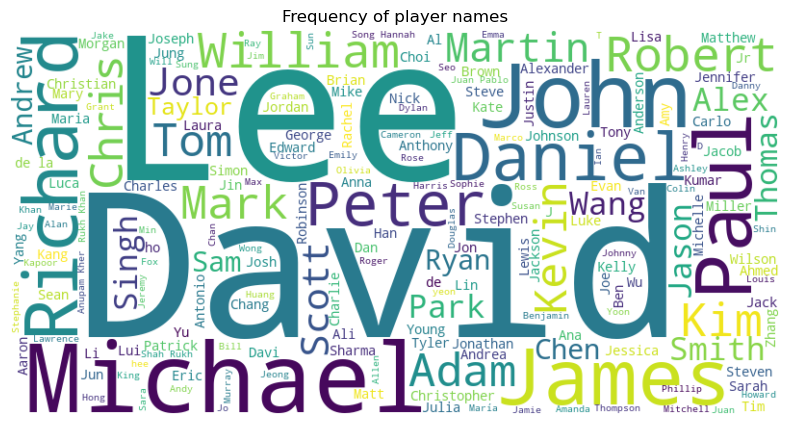

In [73]:
# WordCloud oluştur

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Grafik özelliklerini ayarla
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Frequency of player names')
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"listed_in" sütunu</b></p>

# Farklı kategorilerdeki içeriklerin sayısını göstermek için bir bar grafiği

In [81]:
df.listed_in.value_counts().head(22)

listed_in
Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Ind

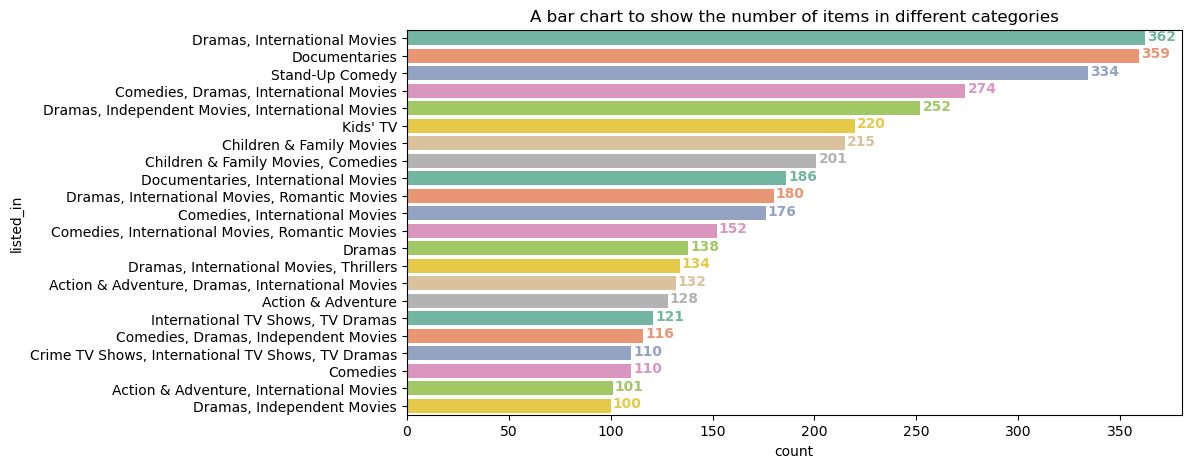

In [75]:
order = df.listed_in.value_counts().head(22).index

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df, y = "listed_in", palette = "Set2", order = order)

plt.title('A bar chart to show the number of items in different categories')

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width() + 1, p.get_y() + 0.5), fontsize=10, color=p.get_facecolor(), fontweight='bold')
    
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"director & listed_in" sütunu</b></p>

# Yönetmenlerin hangi türlerde daha fazla içerik ürettiğini göstermek için bir stacked (yığılmış) bar grafiği

In [76]:
data = pd.DataFrame({
    'director': df.director,
    'listed_in': df.listed_in
})

data = data[(data.director != "Unknown") & (data.director.isin(data.director.value_counts().sort_values(ascending=False).head(11).index)) & (data.listed_in.isin(data.listed_in.value_counts().head(22).index))]
data

,director,listed_in
329,Steven Spielberg,Dramas
406,Rajiv Chilaka,Children & Family Movies
407,Rajiv Chilaka,Children & Family Movies
408,Rajiv Chilaka,Children & Family Movies
409,Rajiv Chilaka,Children & Family Movies
...,...,...
7308,Steven Spielberg,Dramas
7513,Suhas Kadav,"Children & Family Movies, Comedies"
8184,Steven Spielberg,Children & Family Movies
8696,Steven Spielberg,Dramas


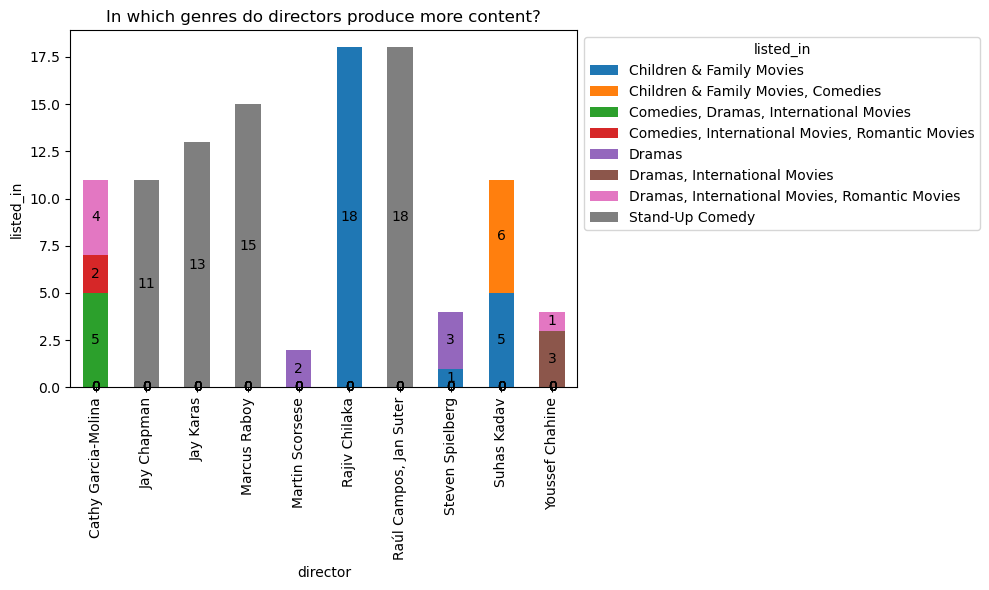

In [77]:
grouped_data = data.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

# Stacked bar grafiği çizme
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Barların üzerine sayıların yazdırılması
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)  # label_type='center' sayıları barların ortasına yerleştirir

# Grafik başlık ve etiketleri
plt.title('In which genres do directors produce more content?')
plt.xlabel('director')
plt.ylabel('listed_in')
plt.legend(title='listed_in', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>"description" sütunu</b></p>

# Açıklamaların uzunlukları hakkında fikir sahibi olmak için histogram görselleştirmesi.

In [78]:
len_data = pd.DataFrame({
    'description': df.description,
    'length': df.description.apply(lambda x: len(x))
})

len_data

,description,length
0,"As her father nears the end of his life, filmm...",152
1,"After crossing paths at a party, a Cape Town t...",147
2,To protect his family from a powerful drug lor...,146
3,"Feuds, flirtations and toilet talk go down amo...",147
4,In a city of coaching centers known to train I...,152
...,...,...
8802,"A political cartoonist, a crime reporter and a...",150
8803,"While living alone in a spooky town, a young g...",120
8804,Looking to survive in a world taken over by zo...,137
8805,"Dragged from civilian life, a former superhero...",149


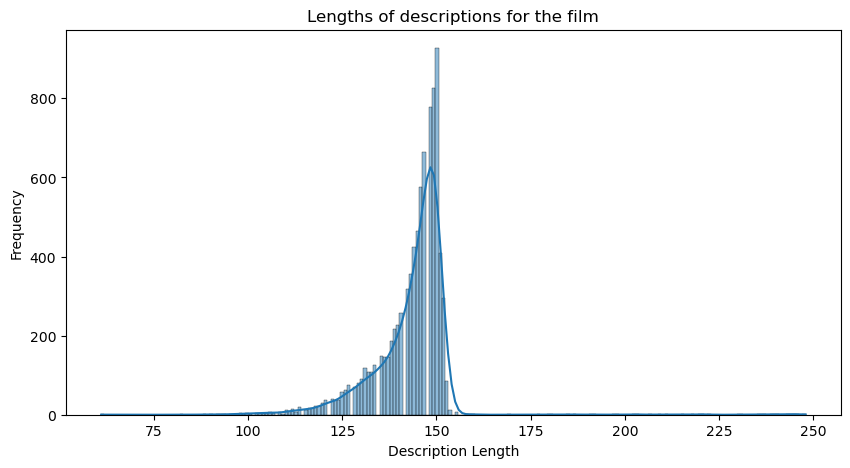

In [79]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.histplot(x = "length", data = len_data, kde = True)

plt.title("Lengths of descriptions for the film")
plt.xlabel("Description Length")
plt.ylabel("Frequency")

plt.show()

<a id='loading-dataset'></a>
# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>HAVE A NICE DAY
</b></p>